In [301]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [302]:
df=pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/DataScience/BangloreHomePrices/model/bengaluru_house_prices.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [303]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [304]:
df=df.drop(['area_type','availability'],axis='columns')
df

,location,size,society,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [305]:
df.isnull().sum()

location         1
size            16
society       5502
total_sqft       0
bath            73
balcony        609
price            0
dtype: int64

In [306]:
df2=df.dropna()
df2.isnull().sum()

location      0
size          0
society       0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [307]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 RK', '4 BHK',
       '1 BHK', '5 BHK', '11 BHK', '5 Bedroom', '9 BHK', '2 Bedroom',
       '6 BHK', '7 BHK', '6 Bedroom'], dtype=object)

In [308]:
df2['size_bhk']=df2['size'].apply(lambda x: int(x.split(' ')[0]) )
df2.head()

C:\Users\user\AppData\Local\Temp\ipykernel_5700\3986726891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['size_bhk']=df2['size'].apply(lambda x: int(x.split(' ')[0]) )


,location,size,society,total_sqft,bath,balcony,price,size_bhk
0,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4
3,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3
5,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00,2
11,Whitefield,4 Bedroom,Prrry M,2785,5.0,3.0,295.00,4


In [309]:
df2=df2.drop('size',axis='columns')
df2.head()

,location,society,total_sqft,bath,balcony,price,size_bhk
0,Electronic City Phase II,Coomee,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,Theanmp,2600,5.0,3.0,120.00,4
3,Lingadheeranahalli,Soiewre,1521,3.0,1.0,95.00,3
5,Whitefield,DuenaTa,1170,2.0,1.0,38.00,2
11,Whitefield,Prrry M,2785,5.0,3.0,295.00,4


In [310]:
df2.size_bhk.unique()

array([ 2,  4,  3,  1,  5, 11,  9,  6,  7], dtype=int64)

In [311]:
df2.total_sqft.loc[400:1000].value_counts()

total_sqft
1200           8
1150           6
1500           5
1000           4
1075           4
              ..
1820           1
2378           1
1641           1
1120 - 1145    1
2112.95        1
Name: count, Length: 244, dtype: int64

In [312]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
df2[~df2.total_sqft.apply(is_float)]

,location,society,total_sqft,bath,balcony,price,size_bhk
30,Yelahanka,LedorSa,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,SNontle,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,Vaarech,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,Kinuerg,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,MCvarar,1015 - 1540,2.0,0.0,56.800,2
...,...,...,...,...,...,...,...
12975,Whitefield,Bhath N,850 - 1060,2.0,0.0,38.190,2
12990,Talaghattapura,Sodgere,1804 - 2273,3.0,0.0,122.000,3
13059,Harlur,Shodsir,1200 - 1470,2.0,0.0,72.760,2
13265,Hoodi,Ranuetz,1133 - 1384,2.0,0.0,59.135,2


In [313]:
def convt_range(x):
    range=x.split('-')
    if len(range)==2:
        return (float(range[0])+float(range[1]))/2
    try:
        return float(x)
    except:
        return None

In [314]:
convt_range('2100 - 2850')

2475.0

In [315]:
df2['total_sqft']=df2.total_sqft.apply(convt_range)


In [316]:
df2.loc[13059]


location       Harlur
society       Shodsir
total_sqft     1335.0
bath              2.0
balcony           0.0
price           72.76
size_bhk            2
Name: 13059, dtype: object

In [317]:
df2.balcony.unique()

array([1., 3., 2., 0.])

In [318]:
df2

,location,society,total_sqft,bath,balcony,price,size_bhk
0,Electronic City Phase II,Coomee,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,Theanmp,2600.0,5.0,3.0,120.00,4
3,Lingadheeranahalli,Soiewre,1521.0,3.0,1.0,95.00,3
5,Whitefield,DuenaTa,1170.0,2.0,1.0,38.00,2
11,Whitefield,Prrry M,2785.0,5.0,3.0,295.00,4
...,...,...,...,...,...,...,...
13313,Uttarahalli,Aklia R,1345.0,2.0,1.0,57.00,3
13314,Green Glen Layout,SoosePr,1715.0,3.0,3.0,112.00,3
13315,Whitefield,ArsiaEx,3453.0,4.0,0.0,231.00,5
13317,Raja Rajeshwari Nagar,Mahla T,1141.0,2.0,1.0,60.00,2


In [319]:
df3=df2.copy()
df3['price_per_sqft']=df3['price']*100000/df3['total_sqft']
df3.head()

,location,society,total_sqft,bath,balcony,price,size_bhk,price_per_sqft
0,Electronic City Phase II,Coomee,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,Theanmp,2600.0,5.0,3.0,120.00,4,4615.384615
3,Lingadheeranahalli,Soiewre,1521.0,3.0,1.0,95.00,3,6245.890861
5,Whitefield,DuenaTa,1170.0,2.0,1.0,38.00,2,3247.863248
11,Whitefield,Prrry M,2785.0,5.0,3.0,295.00,4,10592.459605


In [320]:
len(df3.location.unique())

634

In [321]:
df3.location=df3.location.apply(lambda x: x.strip())
df3_loc=df3.groupby('location')['location'].agg('count').sort_values(ascending=False)
df3_loc

location
Whitefield                        398
Sarjapur  Road                    310
Electronic City                   238
Kanakpura Road                    216
Thanisandra                       215
                                 ... 
Kattigenahalli                      1
Kashi Nagar                         1
Kamakshipalya                       1
Kalhalli                            1
Yeshwanthpur Industrial Suburb      1
Name: location, Length: 626, dtype: int64

In [322]:
other=(df3_loc[df3_loc<=10])
other

location
Amruthahalli                      10
Arekere                           10
Vidyaranyapura                    10
Jalahalli East                    10
Mallasandra                       10
                                  ..
Kattigenahalli                     1
Kashi Nagar                        1
Kamakshipalya                      1
Kalhalli                           1
Yeshwanthpur Industrial Suburb     1
Name: location, Length: 483, dtype: int64

In [323]:
df3.location=df3.location.apply(lambda x:'other' if x in other else x)
len(df3.location.unique())

144

In [324]:
df3

,location,society,total_sqft,bath,balcony,price,size_bhk,price_per_sqft
0,Electronic City Phase II,Coomee,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,Theanmp,2600.0,5.0,3.0,120.00,4,4615.384615
3,Lingadheeranahalli,Soiewre,1521.0,3.0,1.0,95.00,3,6245.890861
5,Whitefield,DuenaTa,1170.0,2.0,1.0,38.00,2,3247.863248
11,Whitefield,Prrry M,2785.0,5.0,3.0,295.00,4,10592.459605
...,...,...,...,...,...,...,...,...
13313,Uttarahalli,Aklia R,1345.0,2.0,1.0,57.00,3,4237.918216
13314,Green Glen Layout,SoosePr,1715.0,3.0,3.0,112.00,3,6530.612245
13315,Whitefield,ArsiaEx,3453.0,4.0,0.0,231.00,5,6689.834926
13317,Raja Rajeshwari Nagar,Mahla T,1141.0,2.0,1.0,60.00,2,5258.545136


In [325]:
df4=df3.drop(['society'],axis='columns')

In [326]:
df4.shape

(7496, 7)

In [327]:
df4[(df4.total_sqft/df4.size_bhk<300)]

,location,total_sqft,bath,balcony,price,size_bhk,price_per_sqft
349,other,11.0,3.0,2.0,74.00,3,672727.272727
480,other,1150.0,4.0,2.0,260.00,4,22608.695652
483,other,1200.0,5.0,2.0,190.00,5,15833.333333
1239,Electronic City,550.0,1.0,1.0,16.00,2,2909.090909
2040,Electronic City,550.0,1.0,1.0,15.00,2,2727.272727
2126,Electronic City Phase II,545.0,1.0,1.0,27.00,2,4954.128440
2486,Bhoganhalli,296.0,1.0,0.0,22.89,1,7733.108108
2796,Electronic City,880.0,2.0,1.0,18.00,3,2045.454545
3097,other,1200.0,5.0,0.0,195.00,5,16250.000000
3238,Electronic City Phase II,545.0,1.0,1.0,35.00,2,6422.018349


In [328]:
df5=df4[~(df4.total_sqft/df4.size_bhk<300)]
df5.shape

(7454, 7)

In [329]:
def outlier(df):
    df_new=pd.DataFrame()
    for key,sub_df in df.groupby('location'):
        m=np.mean(sub_df.price_per_sqft)
        s=np.std(sub_df.price_per_sqft)
        reduced_df=sub_df[(sub_df.price_per_sqft>(m-s))& (sub_df.price_per_sqft<(m+s))]
        df_new=pd.concat([reduced_df,df_new],ignore_index=True)
    return df_new

In [330]:
df6=outlier(df5)
df6.shape

(5862, 7)

In [331]:
df6.location.unique()

array(['other', 'Yeshwanthpur', 'Yelahanka New Town', 'Yelahanka',
       'Whitefield', 'Vittasandra', 'Vijayanagar', 'Varthur',
       'Uttarahalli', 'Tumkur Road', 'Thubarahalli', 'Thigalarapalya',
       'Thanisandra', 'Talaghattapura', 'Subramanyapura', 'Sonnenahalli',
       'Somasundara Palya', 'Seegehalli', 'Sarjapur  Road', 'Sarjapur',
       'Sahakara Nagar', 'Ramamurthy Nagar', 'Ramagondanahalli',
       'Rajiv Nagar', 'Rajaji Nagar', 'Raja Rajeshwari Nagar',
       'Rachenahalli', 'Pattandur Agrahara', 'Parappana Agrahara',
       'Panathur', 'Padmanabhanagar', 'Old Madras Road',
       'Old Airport Road', 'Neeladri Nagar', 'Nagavarapalya',
       'Nagarbhavi', 'Mysore Road', 'Munnekollal', 'Marsur',
       'Marathahalli', 'Malleshwaram', 'Mahadevpura', 'Magadi Road',
       'Lingadheeranahalli', 'Lakshminarayana Pura', 'Kundalahalli',
       'Kudlu Gate', 'Kudlu', 'Kothanur', 'Koramangala', 'Kodihalli',
       'Kodichikkanahalli', 'Kereguddadahalli', 'Kengeri Satellite Town

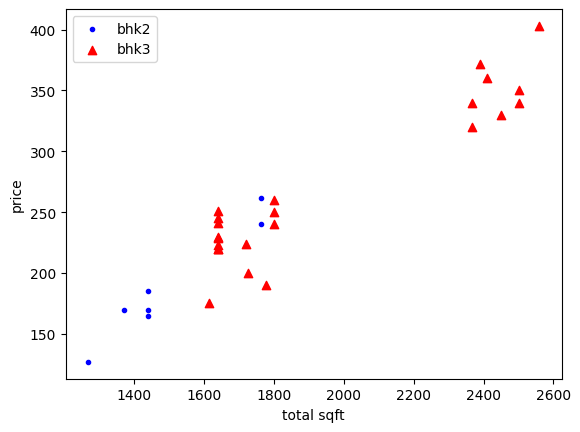

In [332]:
def plt_scatter(df,location):
    bhk2=df[(df.location==location) & (df.size_bhk==2)]
    bhk3=df[(df.location==location) & (df.size_bhk==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price,marker='.',color='blue')
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='^',color='red')
    plt.xlabel('total sqft')
    plt.ylabel('price')
    plt.legend(['bhk2','bhk3'])
    
plt_scatter(df6,'Rajaji Nagar')

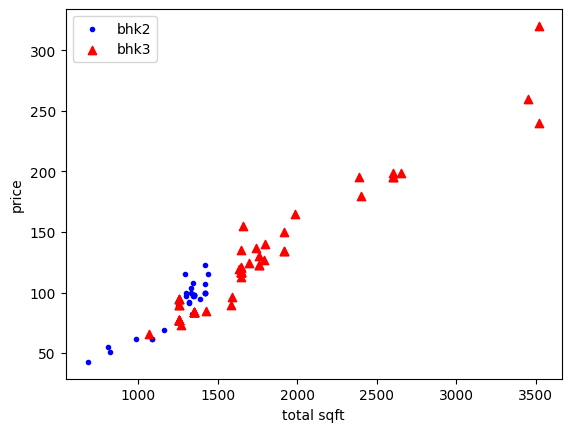

In [333]:
plt_scatter(df6,'Hebbal')

In [334]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for size_bhk,bhk_df in location_df.groupby('size_bhk'):
            bhk_stats[size_bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
    
    for size_bhk,bhk_df in location_df.groupby('size_bhk'):
        stats=bhk_stats.get(size_bhk-1)
        if stats and stats['count']>5:
            exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    
    return df.drop(exclude_indices,axis='index')

df7=remove_bhk_outliers(df6)
df7.shape

(5228, 7)

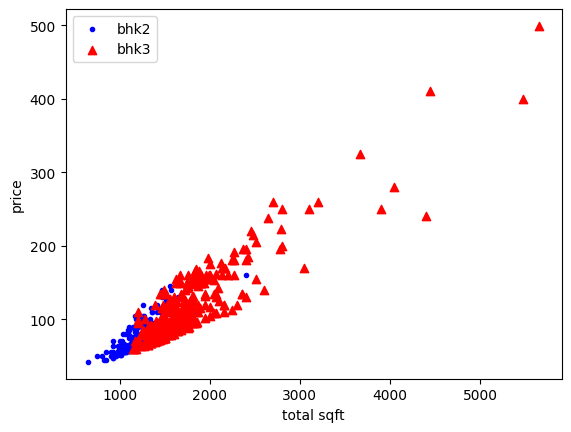

In [335]:
plt_scatter(df7,'other')

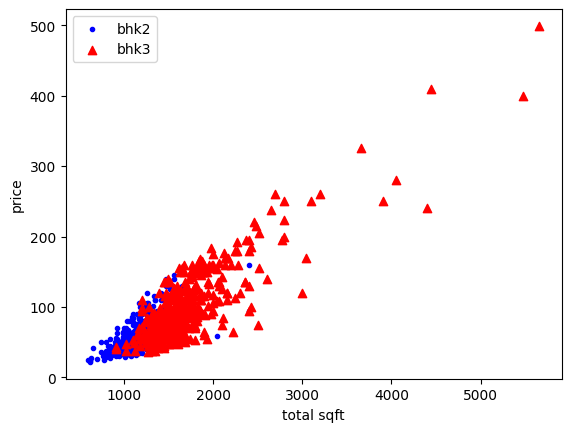

In [336]:
plt_scatter(df6,'other')

(array([ 368., 1293., 1921., 1177.,  313.,   70.,   33.,   23.,   20.,
          10.]),
 array([ 2090.90909091,  3456.65210132,  4822.39511173,  6188.13812214,
         7553.88113254,  8919.62414295, 10285.36715336, 11651.11016377,
        13016.85317418, 14382.59618459, 15748.339195  ]),
 <BarContainer object of 10 artists>)

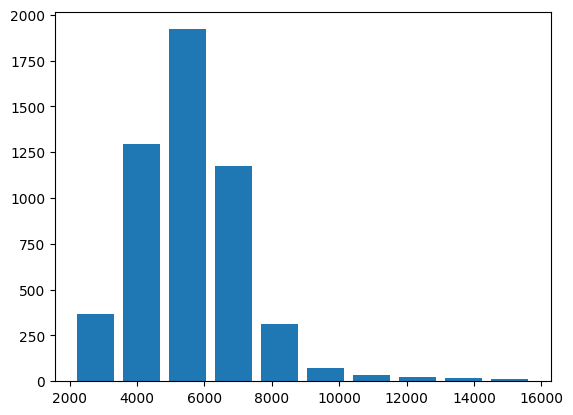

In [337]:
plt.hist(df7.price_per_sqft,rwidth=0.8)

In [338]:
df7.bath.unique()

array([1., 2., 3., 4., 9., 5., 6., 7.])

In [339]:
df7[df7.bath>6]

,location,total_sqft,bath,balcony,price,size_bhk,price_per_sqft
49,other,5000.0,9.0,3.0,360.0,11,7200.000000
58,other,5000.0,9.0,3.0,210.0,9,4200.000000
267,other,11338.0,9.0,1.0,1000.0,6,8819.897689
2860,Old Madras Road,4500.0,7.0,3.0,294.0,5,6533.333333
2879,Old Madras Road,5020.0,7.0,0.0,287.0,5,5717.131474


In [340]:
df8=df7[~(df7.bath>=df7.size_bhk+2)]
df8

,location,total_sqft,bath,balcony,price,size_bhk,price_per_sqft
0,other,600.0,1.0,0.0,38.0,1,6333.333333
2,other,845.0,2.0,1.0,55.0,2,6508.875740
3,other,2511.0,3.0,3.0,205.0,3,8164.078057
4,other,1660.0,2.0,2.0,105.0,3,6325.301205
5,other,1000.0,2.0,2.0,70.0,2,7000.000000
...,...,...,...,...,...,...,...
5857,1st Phase JP Nagar,1590.0,3.0,3.0,131.0,3,8238.993711
5858,1st Phase JP Nagar,2180.0,3.0,2.0,210.0,3,9633.027523
5859,1st Phase JP Nagar,2077.0,3.0,3.0,175.0,3,8425.613866
5860,1st Phase JP Nagar,1205.0,2.0,1.0,85.0,2,7053.941909


In [341]:
df8.location.unique()

array(['other', 'Yeshwanthpur', 'Yelahanka New Town', 'Yelahanka',
       'Whitefield', 'Vittasandra', 'Vijayanagar', 'Varthur',
       'Uttarahalli', 'Tumkur Road', 'Thubarahalli', 'Thigalarapalya',
       'Thanisandra', 'Talaghattapura', 'Subramanyapura', 'Sonnenahalli',
       'Somasundara Palya', 'Seegehalli', 'Sarjapur  Road', 'Sarjapur',
       'Sahakara Nagar', 'Ramamurthy Nagar', 'Ramagondanahalli',
       'Rajiv Nagar', 'Rajaji Nagar', 'Raja Rajeshwari Nagar',
       'Rachenahalli', 'Pattandur Agrahara', 'Parappana Agrahara',
       'Panathur', 'Padmanabhanagar', 'Old Madras Road',
       'Old Airport Road', 'Neeladri Nagar', 'Nagavarapalya',
       'Nagarbhavi', 'Mysore Road', 'Munnekollal', 'Marsur',
       'Marathahalli', 'Malleshwaram', 'Mahadevpura', 'Magadi Road',
       'Lingadheeranahalli', 'Lakshminarayana Pura', 'Kundalahalli',
       'Kudlu Gate', 'Kudlu', 'Kothanur', 'Koramangala', 'Kodihalli',
       'Kodichikkanahalli', 'Kereguddadahalli', 'Kengeri Satellite Town

In [342]:
df9=df8.drop('price_per_sqft',axis='columns')

In [343]:
df10=pd.get_dummies(df9.location)
df10.head()

,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,...,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [344]:
df11=pd.concat([df9,df10.drop('other',axis='columns')],axis='columns')
df12=df11.drop('location',axis='columns')
df12

,total_sqft,bath,balcony,price,size_bhk,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,600.0,1.0,0.0,38.0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,845.0,2.0,1.0,55.0,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2511.0,3.0,3.0,205.0,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1660.0,2.0,2.0,105.0,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,1000.0,2.0,2.0,70.0,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5857,1590.0,3.0,3.0,131.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5858,2180.0,3.0,2.0,210.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5859,2077.0,3.0,3.0,175.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5860,1205.0,2.0,1.0,85.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [345]:
X=df12.drop('price',axis='columns')
Y=df12['price']
X

,total_sqft,bath,balcony,size_bhk,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,600.0,1.0,0.0,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,845.0,2.0,1.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2511.0,3.0,3.0,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1660.0,2.0,2.0,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,1000.0,2.0,2.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5857,1590.0,3.0,3.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5858,2180.0,3.0,2.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5859,2077.0,3.0,3.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5860,1205.0,2.0,1.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [346]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [347]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)
lr.score(X_test,Y_test)

0.9042021860003008

In [348]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv= ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(lr,X,Y,cv=cv)

array([0.90269364, 0.91033193, 0.89894168, 0.90200234, 0.91370227])

In [349]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

def model_params(X,Y):
    algos={
        'linear regression':{
            'model':LinearRegression(),
            'params':{'fit_intercept':[True,False]}},
        
        'DecisionTree':{
            'model':DecisionTreeRegressor(),
            'params':{'criterion':['mse','friedman_mse','squared_error','poisson'],
                      'splitter' :["best", "random"],
                      'min_samples_split':[3],
                      'max_features':['auto', 'sqrt', 'log2'],
                      'random_state':[4],
                      'min_impurity_decrease':[0,2,5],
                      'ccp_alpha':[0,2,5]}},
        
        'lasso':
        {'model':Lasso(),
         'params':{'alpha': [1,2,5],
                   'selection':['random','cyclic'],
                   'max_iter':[10,100,1000],
                   'copy_X':[True,False],
                   'tol':[0.0001,0.001,0.01]}}}
    scores=[]
    cv= ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for model_name,mp in algos.items():
        gd=GridSearchCV(mp['model'],mp['params'],cv=cv,return_train_score=False)
        gd.fit(X,Y)
        scores.append({
            'model':model_name,
            'best_score':gd.best_score_,
            'best_params':gd.best_params_})
    
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [350]:
model_params(X,Y)

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1

,model,best_score,best_params
0,linear regression,0.905801,{'fit_intercept': False}
1,DecisionTree,0.844594,"{'ccp_alpha': 2, 'criterion': 'friedman_mse', ..."
2,lasso,0.779412,"{'alpha': 1, 'copy_X': False, 'max_iter': 10, ..."


In [351]:
dtc=DecisionTreeRegressor()
dtc.fit(X_train,Y_train)
dtc.score(X_test,Y_test)

0.801886162141136

In [352]:
cv= ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(dtc,X,Y,cv=cv)

array([0.85065989, 0.85679202, 0.82552106, 0.80921648, 0.81855424])

In [353]:
def predict_price(location,total_sqft,bath,size_bhk,balcony):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = total_sqft
    x[1] = bath
    x[2] = size_bhk
    x[3] = balcony
    if loc_index >= 0:
        x[loc_index] = 1
# Hello Palak
    return lr.predict([x])[0]

In [354]:
df12.bath.value_counts()

bath
2.0    3008
3.0    1463
1.0     326
4.0     290
5.0      85
9.0       2
6.0       1
Name: count, dtype: int64

In [369]:
predict_price('Yeshwanthpur',10000,4,5,3)

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


692.6733456995553

In [356]:
predict_price('5th Phase JP Nagar',2500,8,10,3)

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


169.00390019811678

In [ ]:
# (location,total_sqft,bath,size_bhk,balcony)

In [357]:
predict_price('1st Phase JP Nagar',5000,5,3,1)

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


400.5257651861678

In [358]:
predict_price('Indira Nagar',50000,6,7,2)

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


3601.651984666926

In [359]:
import pickle
with open ('project1_data.pickle','wb') as f:
    pickle.dump(lr,f)

In [370]:
with open ('X.pickle','wb') as f:
    pickle.dump(X,f)

In [360]:
import json
columns={
    'data_columns':[col.lower() for col in X.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))